In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1,1.0,1.0,2.0,1,3.0,1.0,1.0
1,5,4,4.0,5.0,7.0,10,3.0,2.0,1.0
2,3,1,1.0,1.0,2.0,2,3.0,1.0,1.0
3,6,8,NaN,1.0,NaN,4,3.0,7.0,1.0
4,4,1,NaN,3.0,2.0,1,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3,1,NaN,1.0,NaN,1,2.0,1.0,1.0
679,2,1,NaN,1.0,2.0,1,3.0,NaN,1.0
680,5,10,10.0,10.0,4.0,10,5.0,6.0,3.0
681,1,1,1.0,3.0,2.0,1,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	146
float64		column 4	16
float64		column 5	66
int64		column 6	0
float64		column 7	32
float64		column 8	16
float64		column 9	16


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,683.000000,537.000000,667.000000,617.000000,683.000000,651.000000,667.000000,667.000000
mean,4.442167,3.150805,3.165736,2.869565,3.228525,3.544656,3.433180,2.851574,1.602699
std,2.820761,3.065145,2.942943,2.886141,2.241426,3.643857,2.442522,3.032434,1.737121
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

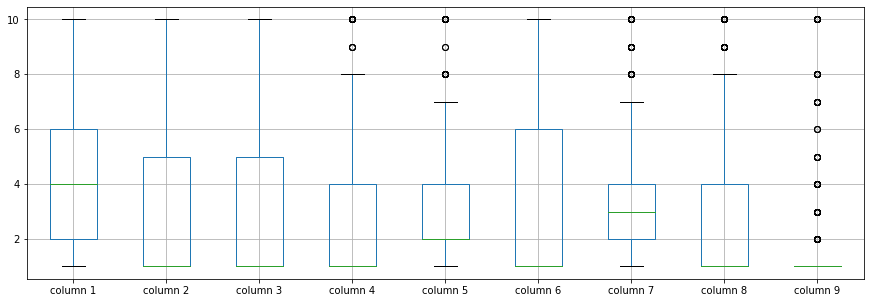

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.150805
column 3    3.165736
column 4    2.869565
column 5    3.228525
column 6    3.544656
column 7    3.433180
column 8    2.851574
column 9    1.602699
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.642481,0.631044,0.485012,0.524969,0.593091,0.553767,0.529123,0.351607
column 2,0.642481,1.000000,0.913130,0.704904,0.753458,0.691709,0.756075,0.708808,0.455758
column 3,0.631044,0.913130,1.000000,0.686214,0.738934,0.705482,0.722913,0.694607,0.418646
column 4,0.485012,0.704904,0.686214,1.000000,0.593989,0.667844,0.666779,0.599479,0.409893
column 5,0.524969,0.753458,0.738934,0.593989,1.000000,0.580484,0.623931,0.628747,0.481522
column 6,0.593091,0.691709,0.705482,0.667844,0.580484,1.000000,0.671358,0.580839,0.333910
column 7,0.553767,0.756075,0.722913,0.666779,0.623931,0.671358,1.000000,0.663166,0.323882
column 8,0.529123,0.708808,0.694607,0.599479,0.628747,0.580839,0.663166,1.000000,0.414748
column 9,0.351607,0.455758,0.418646,0.409893,0.481522,0.333910,0.323882,0.414748,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+64,9+64+64,9+64+64,9+64+64+64+64,9+64+64+64,9+64+64,9+64,9], vae_layer = False, seed = 640)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 35.101661727541966
Epoch: 1 , loss: 34.957150368463424
Epoch: 2 , loss: 34.66779940468924
Epoch: 3 , loss: 34.10706011454264
Epoch: 4 , loss: 30.163715771266393
Epoch: 5 , loss: 28.84445417495001
Epoch: 6 , loss: 28.42951186498006
Epoch: 7 , loss: 28.16691421327137
Epoch: 8 , loss: 27.73286401657831
Epoch: 9 , loss: 27.31826804933094
Epoch: 10 , loss: 27.39810307820638
Epoch: 11 , loss: 26.485578378041584
Epoch: 12 , loss: 26.75267165047782
Epoch: 13 , loss: 25.970141501653764
Epoch: 14 , loss: 25.93073356719244
Epoch: 15 , loss: 25.091368175688245
Epoch: 16 , loss: 24.47825338726952
Epoch: 17 , loss: 24.22617585318429
Epoch: 18 , loss: 24.198271887642996
Epoch: 19 , loss: 24.124457836151123
Epoch: 20 , loss: 24.328307969229563
Epoch: 21 , loss: 23.64153278441656
Epoch: 22 , loss: 23.896227859315417
Epoch: 23 , loss: 23.400495847066242
Epoch: 24 , loss: 22.828544207981654
Epoch: 25 , loss: 23.5162885756

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
1,0,0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
2,0,0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
3,0,0,-5.200203,0.0,-0.297526,0,0.000000,0.000000,0.0
4,0,0,1.111028,0.0,0.000000,0,-0.774198,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
678,0,0,0.428269,0.0,-0.581002,0,0.000000,0.000000,0.0
679,0,0,0.871709,0.0,0.000000,0,0.000000,0.751668,0.0
680,0,0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0
681,0,0,0.000000,0.0,0.000000,0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(47.37546099599967, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.1412808745501665

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1,1.000000,1.0,2.000000,1,3.000000,1.000000,1.0
1,5,4,4.000000,5.0,7.000000,10,3.000000,2.000000,1.0
2,3,1,1.000000,1.0,2.000000,2,3.000000,1.000000,1.0
3,6,8,2.799797,1.0,2.702474,4,3.000000,7.000000,1.0
4,4,1,2.111028,3.0,2.000000,1,2.225802,1.000000,1.0
...,...,...,...,...,...,...,...,...,...
678,3,1,1.428269,1.0,1.418998,1,2.000000,1.000000,1.0
679,2,1,1.871709,1.0,2.000000,1,3.000000,1.751668,1.0
680,5,10,10.000000,10.0,4.000000,10,5.000000,6.000000,3.0
681,1,1,1.000000,3.0,2.000000,1,1.000000,1.000000,1.0


In [20]:
imputations[-1].to_excel("BCW_AG_5(imp).xlsx", index=False, header=False)